## Eigenvalues and Eigenvectors

The commonly used algorithm used to solve eigenvalue problems,
$$ \boldsymbol{AV} = \boldsymbol{VD} $$ 
is the **QR Decomposition**, whereby you can write down the matrix $\boldsymbol{A}$ as a product $\boldsymbol{QR}$ of an orthogonal matrix $\boldsymbol{Q}$ and an upper triangular matrix $\boldsymbol{R}$. In the above equation, $\boldsymbol{V}$ is the eigenvector matrix with eigenvectors $\boldsymbol{v}_i$ as its columns, and $\boldsymbol{D}$ is the diagonal matrix with eigenvalues $\lambda_i$ as its diagonal elements.
Athough the QR algorithm is simple, the calculation of the QR decomposition can be tricky, but not impossible (Exercise 6.8 goes through the steps of obtaining the decomposition and setting up the code yourself; I highly recommend it trying it out for yourself).

In [ ]:
import numpy as np

A = np.array([[1, 2],
             [2, 1]],float)

x, V = np.linalg.eigh(A)   # calculates eigenvalue and eigenvectors
print(x)
print(V)

In [ ]:
x = np.linalg.eigvalsh(A)  # calculates only eigenvalues
print(x)

In [ ]:
# asymmetric matrix: Python ignores upper half of matrix
A = np.array([[1, 0],
             [2, 1]],float)
x = np.linalg.eigvalsh(A)
print(x)

## Asymmetric Quantum Well

A particle of mass $M$ is in a one-dimensional quantum well of width $L$, and arbitrary shape of $V(x)$:

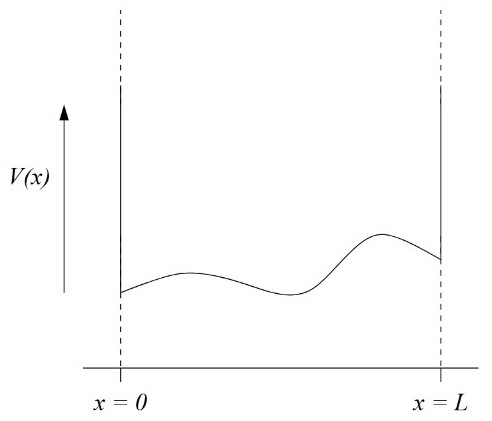

In a pure state of energy $E$, the spatial part of $\psi(x)$ of the wavefunction obeys the time-independent Schrodinger equation: 
$$\hat{H}\psi(x) = E \psi(x)$$
where the Hamiltonian operator is given by:
$$ \hat{H} = - \frac{\hbar^2}{2M}\frac{d^2}{dx^2} + V(x) $$
Assuming the walls of the well are infinitely high, so that the wavefunction is zero outside the well, which means it must go to zero at $x=0$ and $x=L$. In that case, the wavefunction can be expressed as a Fourier sine series:
$$\psi(x) = \sum_{n=1}^\infty \psi_n\sin\frac{\pi nx}{L} $$
where $\psi_1$, $\psi_2$, ..., are the Fourier coefficients.

In matrix form,
$$ \boldsymbol{H}\psi = E \psi$$
where $\boldsymbol{H}$ is the Hamiltonian matrix, $\psi$ is the eigenvector with eigenvalue $E$.  
Calculating eigenvalues of $\boldsymbol{H}$ gives us the allowed energies of the particle in the well.

For $V(x)=ax/L$, the Hamiltonian matrix is given by
$$ 
\begin{align}
H_{mn} =& H_1 + H_2 \\
H_1 =& \frac{\pi^2n^2\hbar^2}{2ML^2} \delta_{mn} \\
H_2 =& 
\begin{cases}
0 & {\rm if}\ m \neq n,\ {\rm and}\ m,n\ {\rm are\ both\ even\ or\ both\ odd}\\
-\left(\frac{2L}{\pi}\right)^2\frac{mn}{(m^2-n^2)^2} & {\rm if}\ m \neq n,\ {\rm and\ one\ is\ even,\ one\ is\ odd}\\
\frac{L^2}{4} & {\rm if}\ m = n
\end{cases}
\end{align}
$$

In [24]:
# constants
h  = 6.626e-34      # Planck's constant
hc = h/2/np.pi      # h cross or h cut = h/2pi
M  = 9.1094e-31     # mass of electron
L  = 5e-10          # width of well, 5 Angstrom
a  = 10*1.6022e-19  # constant coefficient in the potential V(x), 10 eV

def Hamiltonian(m,n):
    h1 = h2 = 0
    if m==n:
        h1 = pow(np.pi*n*hc/L,2)/2/M
        h2 = L*L/4.
    else:
        h1 = 0
        if (m+n)%2==0:    # both odd or even
            h2 = 0
        else:
            h2 = -pow(2*L/np.pi,2)*m*n/(m*m-n*n)**2
    return h1+h2

In [ ]:
# create a 10x10 Hamiltonian matrix
N = 10
H = np.empty((N,N))
for i in range(N):
    for j in range(N):
        H[i,j] = Hamiltonian(i+1,j+1)

E = np.linalg.eigvalsh(H)
print(E/1.6022e-19)   # in eV

# Try it yourself

### Total 4 marks

Calculate the eigenvalue and eigenvector for the ground state and the first two excited states of the well. Use the three $\psi(x)$ and plot the corresponding probability densities $|\psi(x)|^2$ as a function of $x$.